[[0.0000000e+00 3.6578800e+05 0.0000000e+00]
 [0.0000000e+00 2.6710200e+05 6.6805440e+06]
 [0.0000000e+00 1.7094100e+05 4.8903440e+06]
 [0.0000000e+00 0.0000000e+00 6.5185000e+05]
 [1.0000000e+00 2.4329300e+05 5.5380010e+06]
 [0.0000000e+00 2.6709300e+05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 4.9348900e+05]
 [0.0000000e+00 3.7044800e+05 1.1040540e+06]
 [0.0000000e+00 0.0000000e+00 5.2105690e+06]
 [0.0000000e+00 1.9709100e+05 8.8029000e+05]
 [0.0000000e+00 1.3072400e+05 2.2827680e+06]
 [0.0000000e+00 2.8858900e+05 0.0000000e+00]
 [0.0000000e+00 2.4854600e+05 7.6531300e+05]
 [0.0000000e+00 2.5748600e+05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.2182750e+06]
 [0.0000000e+00 0.0000000e+00 3.7220500e+05]
 [1.0000000e+00 2.8854200e+05 0.0000000e+00]
 [0.0000000e+00 2.5165400e+05 1.0563200e+06]
 [0.0000000e+00 2.8855800e+05 1.8506300e+05]
 [0.0000000e+00 6.3744000e+04 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0303290e+06]
 [0.0000000e+00 3.5709100e+05 4.3465440e+06]
 [0.000000

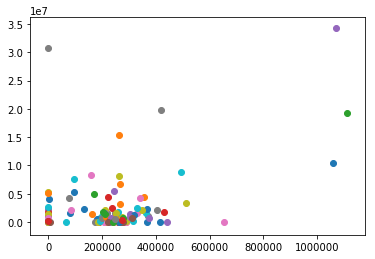

[[0.00000000e+00 3.29165684e-01 0.00000000e+00]
 [0.00000000e+00 2.40360024e-01 1.94493691e-01]
 [0.00000000e+00 1.53826564e-01 1.42374791e-01]
 [0.00000000e+00 0.00000000e+00 1.89776031e-02]
 [1.00000000e+00 2.18934757e-01 1.61230322e-01]
 [0.00000000e+00 2.40351925e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.43671679e-02]
 [0.00000000e+00 3.33359130e-01 3.21428222e-02]
 [0.00000000e+00 0.00000000e+00 1.51697646e-01]
 [0.00000000e+00 1.77358453e-01 2.56282799e-02]
 [0.00000000e+00 1.17636049e-01 6.64592547e-02]
 [0.00000000e+00 2.59695768e-01 0.00000000e+00]
 [0.00000000e+00 2.23661832e-01 2.22809026e-02]
 [0.00000000e+00 2.31706768e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.45816409e-02]
 [0.00000000e+00 0.00000000e+00 1.08361721e-02]
 [1.00000000e+00 2.59653474e-01 0.00000000e+00]
 [0.00000000e+00 2.26458662e-01 3.07531207e-02]
 [0.00000000e+00 2.59667872e-01 5.38782261e-03]
 [0.00000000e+00 5.73620167e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.999643

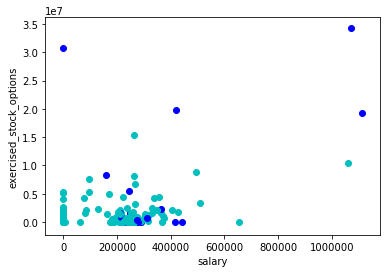

In [7]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

print(data)

### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2  in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)
print(data)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
pred = kmeans.labels_



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [6]:
print(data)


[[0.00000000e+00 3.29165684e-01 0.00000000e+00]
 [0.00000000e+00 2.40360024e-01 1.94493691e-01]
 [0.00000000e+00 1.53826564e-01 1.42374791e-01]
 [0.00000000e+00 0.00000000e+00 1.89776031e-02]
 [1.00000000e+00 2.18934757e-01 1.61230322e-01]
 [0.00000000e+00 2.40351925e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.43671679e-02]
 [0.00000000e+00 3.33359130e-01 3.21428222e-02]
 [0.00000000e+00 0.00000000e+00 1.51697646e-01]
 [0.00000000e+00 1.77358453e-01 2.56282799e-02]
 [0.00000000e+00 1.17636049e-01 6.64592547e-02]
 [0.00000000e+00 2.59695768e-01 0.00000000e+00]
 [0.00000000e+00 2.23661832e-01 2.22809026e-02]
 [0.00000000e+00 2.31706768e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.45816409e-02]
 [0.00000000e+00 0.00000000e+00 1.08361721e-02]
 [1.00000000e+00 2.59653474e-01 0.00000000e+00]
 [0.00000000e+00 2.26458662e-01 3.07531207e-02]
 [0.00000000e+00 2.59667872e-01 5.38782261e-03]
 [0.00000000e+00 5.73620167e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.999643